# Regression

## Linear Regression

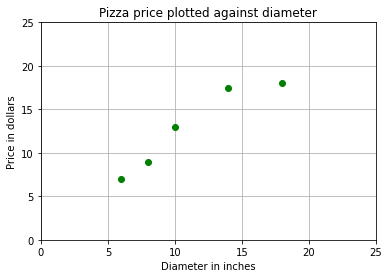

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# List of List input and output format is important 
# Ordinary Least Square takes Multiple Input and
# Predicts Multiple Outputs

PSize = [[6], [8], [10], [14], [18]]
PPrice = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize, PPrice, 'go')
plt.axis([0, 25, 0, 25])
plt.grid(True)

[[6], [10], [14], [18]]
[[8]]
[[7], [13], [17.5], [18]]
[[9]]


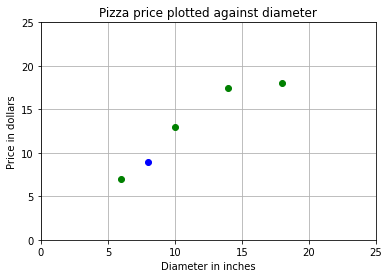

In [2]:
from sklearn.model_selection import train_test_split

PSize_train, PSize_test, PPrice_train, PPrice_test = \
train_test_split(PSize, PPrice, test_size=0.2)
# other arguments - random_state = None, shuffle = True

print(PSize_train)
print(PSize_test)
print(PPrice_train)
print(PPrice_test)

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize_train, PPrice_train, 'go')
plt.plot(PSize_test, PPrice_test, 'bo')
plt.axis([0, 25, 0, 25])
plt.grid(True)

In [3]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(PSize_train, PPrice_train)

print(PPrice_test)           ## Actual Output
print(model.predict(PSize_test)) ## Predicted output

[[9]]
[[10.125]]


In [4]:
print(model.predict([[0]])) # Prediction of inexperienced data
print(model.predict([[25]]))
print(model.predict([[0],[50]]))

[[2.625]]
[[26.0625]]
[[ 2.625]
 [49.5  ]]


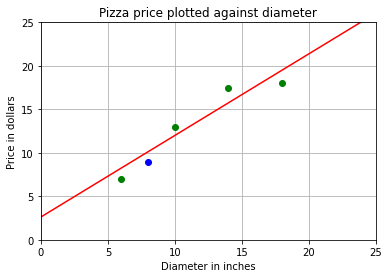

In [5]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize_train, PPrice_train, 'go')
plt.plot(PSize_test, PPrice_test, 'bo')
plt.axis([0, 25, 0, 25])
plt.grid(True)

# Plot Regression Solution Line
plt.plot([0,25],[model.predict([[0]])[0][0],\
                 model.predict([[25]])[0][0]],\
         color = 'r')

In [6]:
print("Slope(m) is %.2f and Intercept(c) is %0.2f"
      %(model.coef_,model.intercept_))

Slope(m) is 0.94 and Intercept(c) is 2.63


In [7]:
print(model.score(PSize,PPrice)) # R2 coefficient

0.9059606481481481


In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(PPrice, model.predict(PSize),\
                   multioutput = 'uniform_average')
# multioutput defines weights used to average errors

print("MSE is ", mse)

MSE is  1.828125


## Stochastic Gradient Descent

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[ 7.   9.  13.  17.5 18. ]


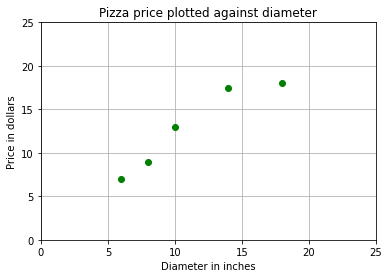

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [6, 8, 10, 14, 18]
X = np.array(X).reshape(-1,1)
Y = [7, 9, 13, 17.5, 18]
Y = np.array(Y)

print(X)
print(Y)

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid(True)

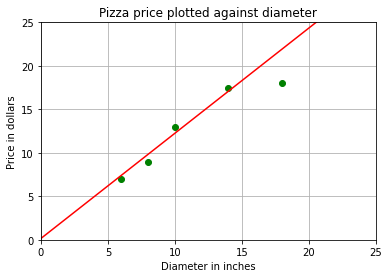

In [81]:
from sklearn.linear_model import SGDRegressor

# Create and fit the model
model = SGDRegressor(loss="squared_loss", max_iter=100000)


model.fit(X, Y)

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, Y, 'go')
plt.axis([0, 25, 0, 25])
plt.grid(True)

# Plot Regression Solution line
plt.plot([0, 25], [model.predict([[0]]), model.predict([[25]])], color='r')

In [82]:
print(model.predict([[0]])) # Prediction of inexperienced data
print(model.predict([[25]]))
print(model.predict([[0],[50]]))

[0.16]
[30.39]
[ 0.16 60.62]


In [83]:
print(model.n_iter_)

9


In [84]:
print(model.score(X,Y)) # R2 coefficient

0.825346179174081


In [85]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, model.predict(X),multioutput = 'uniform_average')
# multioutput defines weights used to average errors

print("SGD MSE is ", mse)

SGD MSE is  3.3952702768558667


In [86]:
print("Slope(m) is %.2f and Intercept(c) is %0.2f"
      %(model.coef_,model.intercept_))

Slope(m) is 1.21 and Intercept(c) is 0.16


## Polynomial Regression

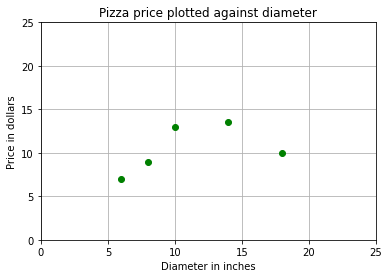

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

PSize = [[6], [8], [10], [14], [18]]
PPrice = [[7], [9], [13], [13.5], [10]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(PSize, PPrice, 'go')
plt.axis([0, 25, 0, 25])
plt.grid(True)

In [90]:
%precision 2
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
# degree=2, interaction_only=False, include_bias=True, order=’C’

QuadraticCoeff = poly.fit_transform(PSize)
print(QuadraticCoeff)

[[1.00e+00 6.00e+00 3.60e+01 2.16e+02]
 [1.00e+00 8.00e+00 6.40e+01 5.12e+02]
 [1.00e+00 1.00e+01 1.00e+02 1.00e+03]
 [1.00e+00 1.40e+01 1.96e+02 2.74e+03]
 [1.00e+00 1.80e+01 3.24e+02 5.83e+03]]


In [92]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(QuadraticCoeff, PPrice)

print(PPrice)           ## Actual Output
print(model.predict(QuadraticCoeff)) ## Predicted output

[[7], [9], [13], [13.5], [10]]
[[ 6.73]
 [ 9.86]
 [12.2 ]
 [13.77]
 [ 9.95]]


In [93]:
print(poly.fit_transform([[0]]))
print(model.predict(poly.fit_transform([[0]])))

[[1. 0. 0. 0.]]
[[-5.48]]


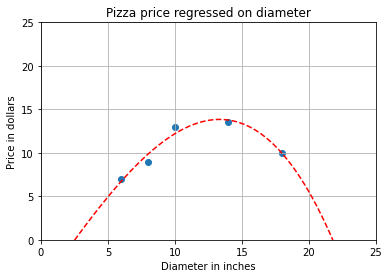

In [99]:
#plotting the curve
xx = np.linspace(0, 25, 100)
# print(xx)
xx_quadratic = poly.transform(xx.reshape(xx.shape[0], 1))
# print(xx.shape[0])
# print(xx.reshape(xx.shape[0], 1))

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid()
plt.plot(xx, model.predict(xx_quadratic), c='r',linestyle='--')
plt.scatter(PSize, PPrice)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(PPrice, model.predict(poly.fit_transform(PSize)),multioutput = 'uniform_average')
# multioutput defines weights used to average errors

print("SGD MSE is ", mse)

SGD MSE is  0.30535714285714166
